In [33]:
# Import a whole load of useful packages
import numpy as np 
import pandas as pd
from netCDF4 import Dataset
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import os.path
import re
from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr
import glob
import itertools
from matplotlib.pyplot import cm
from matplotlib.ticker import LogFormatter
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.colors import LogNorm 
from scipy.interpolate import griddata 
from scipy.fft import fft, ifft, fft2, ifft2, fftshift, fftfreq
from scipy import signal
from scipy.optimize import minimize
from descartes import PolygonPatch

In [3]:
# Import coastlines, subglacial lakes etc
coastlineM = gpd.read_file("Coastline_Antarctica_v2.shp")
groundinglineM = gpd.read_file("Groundingline_Antarctica_v2.shp")
glacierlinesM = gpd.read_file("IceBoundaries_Antarctica_v2.shp")
Thwaites = glacierlinesM[glacierlinesM['Asso_Shelf']=='Thwaites']
PineIsland = glacierlinesM[(glacierlinesM['NAME']=='Pine_Island')&\
                           (glacierlinesM['Asso_Shelf']=='Pine_Island')]
Lakes = gpd.read_file("Thw_lakes_outlines.shp")
from shapely.geometry import Point, LineString, Polygon
poly = Polygon([(-1.318e6, -0.47e6), (-1.278e6, -0.463e6), \
                (-1.282e6, -0.442e6), (-1.320e6, -0.448e6)])
poly2 = Polygon([(-1.430e6, -0.47e6), (-1.385e6, -0.460e6), \
                (-1.395e6, -0.437e6), (-1.435e6, -0.445e6)])
lat5dg = gpd.read_file("../Data/1dg_latitude.shp")
lon15dg = gpd.read_file("../Data/2dg_longitude.shp")

In [5]:
# Convert the subglacial lakes filesfrom lat, long to polar stereographic
from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326","epsg:3031")
x0, y0 = transformer.transform(Lakes['geometry'][0].exterior.xy[1],Lakes['geometry'][0].exterior.xy[0])
x1, y1 = transformer.transform(Lakes['geometry'][1].exterior.xy[1],Lakes['geometry'][1].exterior.xy[0])
x2, y2 = transformer.transform(Lakes['geometry'][2].exterior.xy[1],Lakes['geometry'][2].exterior.xy[0])
x3, y3 = transformer.transform(Lakes['geometry'][3].exterior.xy[1],Lakes['geometry'][3].exterior.xy[0])

In [6]:
# Import the model ouput
# Grid 0 = -1.40e6 centre 
filepath = r"output.nc"
#filepath = r"output_1_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_1 = output.variables['x'][:]
Y_1 = output.variables['y'][:]
x_1, y_1 = np.meshgrid(X_1, Y_1)
bedmach_1 = output.variables['bedmach'][:,:]
bed_1 = output.variables['bed'][:,:]
errbed_1 = output.variables['errbed'][:,:]
slip_1 = output.variables['slip'][:,:]
errslip_1 = output.variables['errslip'][:,:]
output.close()

In [7]:
# Import the model ouput
# Grid 2 = -1.36e6 centre 
filepath = r"output2.nc"
#filepath = r"output_2_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_2 = output.variables['x'][:]
Y_2 = output.variables['y'][:]
x_2, y_2 = np.meshgrid(X_2, Y_2)
bedmach_2 = output.variables['bedmach'][:,:]
bed_2 = output.variables['bed'][:,:]
errbed_2 = output.variables['errbed'][:,:]
slip_2 = output.variables['slip'][:,:]
errslip_2 = output.variables['errslip'][:,:]
output.close()

In [8]:
# Import the model ouput
# Grid 3 = -1.32e6 centre 
filepath = r"output3.nc"
#filepath = r"output_3_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_3 = output.variables['x'][:]
Y_3 = output.variables['y'][:]
x_3, y_3 = np.meshgrid(X_3, Y_3)
bedmach_3 = output.variables['bedmach'][:,:]
bed_3 = output.variables['bed'][:,:]
errbed_3 = output.variables['errbed'][:,:]
slip_3 = output.variables['slip'][:,:]
errslip_3 = output.variables['errslip'][:,:]
output.close()

In [9]:
# Import the model ouput
# Grid 4 = -1.28e6 centre 
filepath = r"output4.nc"
#filepath = r"output_4_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_4 = output.variables['x'][:]
Y_4 = output.variables['y'][:]
x_4, y_4 = np.meshgrid(X_4, Y_4)
bedmach_4 = output.variables['bedmach'][:,:]
bed_4 = output.variables['bed'][:,:]
errbed_4 = output.variables['errbed'][:,:]
slip_4 = output.variables['slip'][:,:]
errslip_4 = output.variables['errslip'][:,:]
output.close()

In [10]:
# Import the model ouput
# Grid 5 = -1.24e6 centre 
filepath = r"output5.nc"
#filepath = r"output_5_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_5 = output.variables['x'][:]
Y_5 = output.variables['y'][:]
x_5, y_5 = np.meshgrid(X_5, Y_5)
bedmach_5 = output.variables['bedmach'][:,:]
bed_5 = output.variables['bed'][:,:]
errbed_5 = output.variables['errbed'][:,:]
slip_5 = output.variables['slip'][:,:]
errslip_5 = output.variables['errslip'][:,:]
output.close()

In [11]:
# Import the model ouput
# Grid 6 = -1.44e6 centre 
filepath = r"output6.nc"
#filepath = r"output_6_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_6 = output.variables['x'][:]
Y_6 = output.variables['y'][:]
x_6, y_6 = np.meshgrid(X_6, Y_6)
bedmach_6 = output.variables['bedmach'][:,:]
bed_6 = output.variables['bed'][:,:]
errbed_6 = output.variables['errbed'][:,:]
slip_6 = output.variables['slip'][:,:]
errslip_6 = output.variables['errslip'][:,:]
output.close()

In [12]:
# Import the model ouput
# Grid 6 = -1.44e6 centre 
filepath = r"output7_nan.nc"
#filepath = r"output_7_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_7 = output.variables['x'][:]
Y_7 = output.variables['y'][:]
x_7, y_7 = np.meshgrid(X_7, Y_7)
bedmach_7 = output.variables['bedmach'][:,:]
bed_7 = output.variables['bed'][:,:]
errbed_7 = output.variables['errbed'][:,:]
slip_7 = output.variables['slip'][:,:]
errslip_7 = output.variables['errslip'][:,:]
output.close()

In [13]:
# Import the model ouput
# Grid 8 = long top strip
filepath = r"output8.nc"
#filepath = r"output_8_150.nc"
output = Dataset(filepath,'r',format='netCDF4')
X_8 = output.variables['x'][:]
Y_8 = output.variables['y'][:]
x_8, y_8 = np.meshgrid(X_8, Y_8)
bedmach_8 = output.variables['bedmach'][:,:]
bed_8 = output.variables['bed'][:,:]
errbed_8 = output.variables['errbed'][:,:]
slip_8 = output.variables['slip'][:,:]
errslip_8 = output.variables['errslip'][:,:]
output.close()

In [14]:
# Combine data to make just one array
x_coord = np.hstack((x_7, x_6, x_1, x_2, x_3, x_4, x_5))
y_coord = np.hstack((y_7, y_6, y_1, y_2, y_3, y_4, y_5))
bedmach = np.hstack((bedmach_7, bedmach_6, bedmach_1, bedmach_2, bedmach_3, bedmach_4, bedmach_5))
bed = np.hstack((bed_7, bed_6, bed_1, bed_2, bed_3, bed_4, bed_5))
errbed = np.hstack((errbed_7, errbed_6, errbed_1, errbed_2, errbed_3, errbed_4, errbed_5))
slip = np.hstack((slip_7, slip_6, slip_1, slip_2, slip_3, slip_4, slip_5))
errslip = np.hstack((errslip_7, errslip_6, errslip_1, errslip_2, errslip_3, errslip_4, errslip_5))

In [15]:
# Combine data to make just one array
x_coord = np.vstack((x_8, x_coord))
y_coord = np.vstack((y_8, y_coord))
bedmach = np.vstack((bedmach_8, bedmach))
bed = np.vstack((bed_8, bed))
errbed = np.vstack((errbed_8, errbed))
slip = np.vstack((slip_8, slip))
errslip = np.vstack((errslip_8, errslip))

In [16]:
# Create some useful things from the data
diff = np.abs(bed - bedmach)
poly_data = Polygon([(np.min(x_coord), np.min(y_coord)), (np.min(x_coord), np.max(y_coord)), \
                (np.max(x_coord), np.max(y_coord)), (np.max(x_coord), np.min(y_coord))])
edge = 3.75e4
poly_data2 = Polygon([(np.min(x_coord)-edge, np.min(y_coord)-edge), (np.min(x_coord)-edge, np.max(y_coord)+edge), \
                (np.max(x_coord)+edge, np.max(y_coord)+edge), (np.max(x_coord)+edge, np.min(y_coord)-edge)])

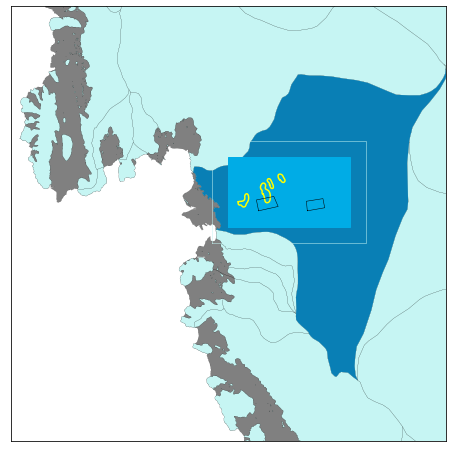

In [19]:
# Look at the region covered by the data
fig, ax = plt.subplots(1,1, figsize = (8,8))
coastlineM.plot(ax=ax, facecolor='grey')
groundinglineM.plot(ax=ax, facecolor='#c6f5f3')
glacierlinesM.plot(ax=ax, facecolor='none',edgecolor='k', linewidth=0.1)
Thwaites.plot(ax=ax, facecolor='#097fb5',edgecolor='none', linewidth=0.1)
plt.plot(*(x0,y0), color = '#ffff00')
plt.plot(*(x1,y1), color = '#ffff00')
plt.plot(*(x2,y2), color = '#ffff00')
plt.plot(*(x3,y3), color = '#ffff00')
plt.plot(*poly.exterior.xy, color='k', linewidth = 0.5)
plt.plot(*poly2.exterior.xy, color='k', linewidth = 0.5)
plt.plot(*poly_data2.exterior.xy, color = '#c6f5f3', linewidth = 0.5)
data_patch = PolygonPatch(poly_data, fc = '#00ace6', ec = '#00ace6')
ax.add_patch(data_patch)
plt.xlim(-2e6, -1e6)
plt.ylim(-1e6,0)
ax.get_xaxis().set_ticks([]); ax.get_yaxis().set_ticks([]);
#plt.savefig('Areacovered.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')

In [21]:
# Set limits for plotting the data
errbed_min = 0 #np.min(errbed)
errbed_max = 200#np.max(errbed)
bed_min = np.min(bed)
bed_max = np.max(bed)
bedmach_min = np.min(bedmach)
bedmach_max = np.max(bedmach)
bedboth_min = -1800 #np.min((bed_min, bedmach_min))
bedboth_max = -650 #np.max((bed_max, bedmach_max))
diff_min = 0 # np.min(diff)
diff_max = 400 #np.max(diff) 
slip_min = 0 #np.min(slip)
slip_max = 200 # 300 #400 #np.max(slip)
errslip_min = np.min(errslip)
errslip_max = 40 # np.max(errslip)

In [22]:
# Load in the surface data for this region
def data_load(bounds):
    ## Import the ITSLIVE Data
    filepath = "../new_itslive.nc"
    fh = Dataset(filepath, 'r', format='NETCDF4');
    X = fh.variables['x'][:]
    Y = fh.variables['y'][:]
    xl = next(x for x, val in enumerate(X) if val >= bounds[0]) # X in ascending order
    xh = next(x for x, val in enumerate(X) if val >= bounds[1])
    yl = next(x for x, val in enumerate(Y) if val <= bounds[2])  # Y in descending order
    yh = next(x for x, val in enumerate(Y) if val <= bounds[3])  
    VX = fh.variables['vx'][yh:yl, xl:xh]
    VY = fh.variables['vy'][yh:yl, xl:xh]
    X2 = fh.variables['x'][xl:xh]
    Y2 = fh.variables['y'][yh:yl]
    X2, Y2 = np.meshgrid(X2, Y2)
    fh.close()
    ### Import the REMA Data (and Bedmachine) ###
    filepath2 = "../new.nc"
    fh2 = Dataset(filepath2, 'r', format='NETCDF4');
    Xnew = fh2.variables['x'][:]
    Ynew = fh2.variables['y'][:]
    Ynew = np.flip(Ynew)
    xl2 = next(x for x, val in enumerate(Xnew) if val >= bounds[0]) # X in ascending order
    xh2 = next(x for x, val in enumerate(Xnew) if val >= bounds[1])
    yl2 = next(x for x, val in enumerate(Ynew) if val <= bounds[2])  # Y in descending order
    yh2 = next(x for x, val in enumerate(Ynew) if val <= bounds[3])  
    SURF = fh2.variables['surf'][yh2:yl2,xl2:xh2]
    BED = fh2.variables['bed'][yh2:yl2,xl2:xh2]
    THICK = fh2.variables['thick'][yh2:yl2,xl2:xh2]
    fh2.close()
    if np.sum(np.isnan(SURF)) > 0:
        print('Nan in surface data causing errors')    
    X_mesh = Xnew[xl2:xh2], 
    Y_mesh = Ynew[yh2:yl2], 
    X_mesh, Y_mesh = np.meshgrid(X_mesh,Y_mesh)
    return X2, Y2, VX, VY, SURF, BED, THICK

In [23]:
x_outline, y_outline, vx_outline, vy_outline, surf_outline, bed_outline, thick_outline = \
        data_load([x_coord.min(),x_coord.max()+120, y_coord.min(), y_coord.max()+240])

In [25]:
# Dimensionalise slipperiness and standard deviation of slipperiness
velocity = np.sqrt(vx_outline ** 2 + vy_outline ** 2)
slip2 = slip.copy()
slip2[slip2 > 8000] = np.nan
slip2[slip2 < 0] = np.nan
slip3 = (slip2/100) * velocity/(101 * 917 * 9.8 * thick_outline * np.sin(0.002))
errslip2 = errslip.copy()
errslip2[errslip2 > 80] = np.nan
errslip3 = (errslip2/100) * velocity/(101 * 917 * 9.8 * thick_outline * np.sin(0.002))

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [26]:
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(np.floor(np.log10(abs(num))))
    coeff = round(num / float(10**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}x10^{{{1:d}}}$".format(coeff, exponent, precision)

In [35]:
# Set limits for standard deviation of bed topography
errslip_min = 0
errslip_max = 2e-5

C:\Users\s1502187\Anaconda3\envs\geo_py37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


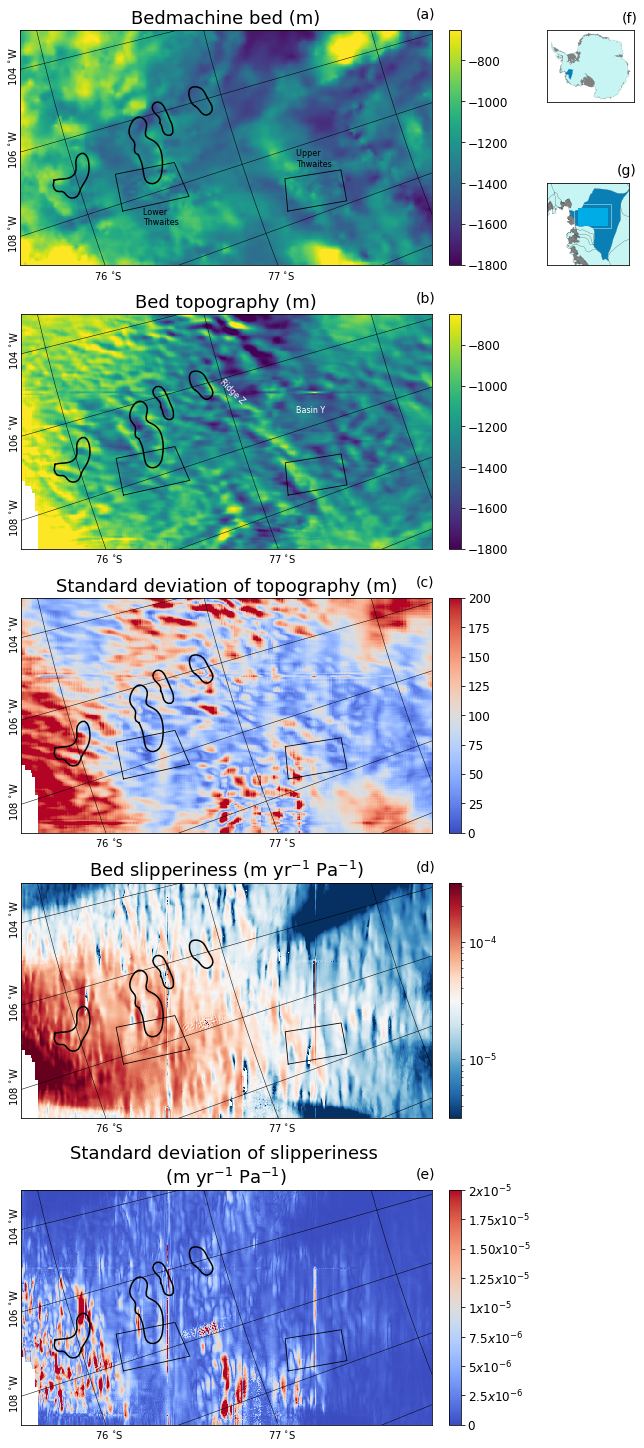

In [36]:
# Main results figure
# Bedmachine bed, inversion bed topography, inversion standard deviation of bed topography
# Inversion bed slipperiness, Inversion standard devaition of bed slipperiness

fig = plt.figure(constrained_layout=True, figsize = (15,20))
widths = [3, 0.05, 1]
heights = [0.62,0.685, 0.70,2,2,2,2]
gs = fig.add_gridspec(7,3, width_ratios = widths, height_ratios = heights)
ax = [[],[],[],[],[]] 
cax = [[],[],[],[],[]] 
for i in range(4):
    ax[i+1] = fig.add_subplot(gs[i+3, 0])
    cax[i+1] = fig.add_subplot(gs[i+3,1])
ax[0] = fig.add_subplot(gs[0:3,0])
cax[0] = fig.add_subplot(gs[0:3,1])
cax3 = fig.add_subplot(gs[5,1])
ax2 = fig.add_subplot(gs[0:1, -1])
ax3 = fig.add_subplot(gs[2:3, -1])


plts = [bedmach, bed, errbed, slip, errslip3]
clim = [(bedboth_min, bedboth_max),(bedboth_min, bedboth_max), (errbed_min, errbed_max),\
        (slip_min, slip_max),(errslip_min, errslip_max)]
cmap = ['viridis', 'viridis', 'coolwarm', 'RdBu_r','coolwarm']
im = [[],[],[],[],[]]
cb = [[],[],[],[],[]]
titles = ['Bedmachine bed (m)', 'Bed topography (m)','Standard deviation of topography (m)',\
          'Bed slipperiness (m yr$^{-1}$ Pa$^{-1}$)',\
          'Standard deviation of slipperiness \n(m yr$^{-1}$ Pa$^{-1}$)']
sub_labels = ['(a)','(b)','(c)','(d)','(e)']
div = 5 # Increase to reduce array size and speed up plotting
for i in range(5):
    im[i] = ax[i].pcolor(x_coord[::div, ::div], y_coord[::div, ::div], \
                         plts[i][::div, ::div], cmap = cmap[i])
    im[i].set_clim(clim[i])
    ax[i].get_xaxis().set_ticks([]); ax[i].get_yaxis().set_ticks([]);
    ax[i].set_title(titles[i], fontsize = 18)
im[3].remove()
im[3] = ax[3].pcolor(x_coord[::div, ::div], y_coord[::div, ::div], slip3[::div, ::div], cmap='RdBu_r', \
               norm=colors.LogNorm(vmin=(10 **-5.5), vmax=(10**-3.5)))    
for i in range(5):    
    cb[i] = plt.colorbar(im[i], ax = ax[i], cax = cax[i]);
    lw = 1.5
    col_lake = 'k' #'#ff33d7'
    ax[i].plot(*(x0,y0), color = col_lake, linewidth = lw)
    ax[i].plot(*(x1,y1), color = col_lake, linewidth = lw)
    ax[i].plot(*(x2,y2), color = col_lake, linewidth = lw)
    ax[i].plot(*(x3,y3), color = col_lake, linewidth = lw)
    ax[i].plot(*poly.exterior.xy, color='k', linewidth = 0.8)
    ax[i].plot(*poly2.exterior.xy, color='k', linewidth = 0.8)
    ax[i].set_xlim(np.min(x_7), np.max(x_5))
    ax[i].set_ylim(np.min(y_1), np.max(y_8))
    for t in cb[i].ax.get_yticklabels():
         t.set_fontsize(12)
    lat5dg.plot(ax=ax[i], edgecolor='k', facecolor = 'None', linewidth = 0.5)
    lon15dg.plot(ax=ax[i], edgecolor='k', facecolor ='None', linewidth = 0.5)
    ax[i].annotate(sub_labels[i], xy = (0.96,1.05), xycoords = 'axes fraction', fontsize = 14)
    ax[i].annotate('77 $^{\circ}$S', xy = (0.60, -0.06), xycoords = 'axes fraction', fontsize = 10)
    ax[i].annotate('76 $^{\circ}$S', xy = (0.18, -0.06), xycoords = 'axes fraction', fontsize = 10)
    ax[i].annotate('104 $^{\circ}$W', xy = (-0.03, 0.77), xycoords = 'axes fraction', fontsize = 10, \
             rotation = 90)
    ax[i].annotate('106 $^{\circ}$W', xy = (-0.03, 0.42), xycoords = 'axes fraction', fontsize = 10, \
             rotation = 90)
    ax[i].annotate('108 $^{\circ}$W', xy = (-0.03, 0.06), xycoords = 'axes fraction', fontsize = 10, \
             rotation = 90)
    ax[i].set_anchor('E')

#cb[3].remove()
#im[3].remove()
#im = ax[3].pcolor(x_coord[::div, ::div], y_coord[::div, ::div], slip3[::div, ::div], cmap='RdBu_r', \
#               norm=LogNorm(vmin=(10 **-5.5), vmax=(10**-3.5)))
t = [4*10**-6, 10**-5, 2*10**-5,4*10**-5,10**-4, 2*10**-4]
t2 = [sci_notation(t[0], decimal_digits =0), sci_notation(t[1], decimal_digits =0),
     sci_notation(t[2], decimal_digits =0),sci_notation(t[3], decimal_digits =0),
           sci_notation(t[4], decimal_digits =0),sci_notation(t[5], decimal_digits =0)]
#cb3 = plt.colorbar(im, ax = ax[3], ticks=t, format='$%.6f$')
#cb[3].ax.set_yticklabels(t2);
   
t3 = [0, sci_notation(0.25e-5,decimal_digits =1), sci_notation(0.5e-5,decimal_digits =0),
     sci_notation(0.75e-5,decimal_digits =1),sci_notation(1e-5,decimal_digits =0), 
     sci_notation(1.25e-5,decimal_digits =2),sci_notation(1.5e-5,decimal_digits =2),
     sci_notation(1.75e-5,decimal_digits =2),sci_notation(2e-5,decimal_digits =0)]    
cb[4].ax.set_yticklabels(t3);
#for i in range(5):
#    cb[i].ax.tick_params(labelsize='12')
    
# Antarctic map
coastlineM.plot(ax=ax2, facecolor='grey')
groundinglineM.plot(ax=ax2, facecolor='#c6f5f3')
Thwaites.plot(ax=ax2, facecolor='#097fb5',edgecolor='none', linewidth=0.1)
ax2.get_xaxis().set_ticks([]); ax2.get_yaxis().set_ticks([]);
ax2.annotate('(f)', xy = (0.85,1.1), xycoords = 'axes fraction', fontsize = 14)
ax2.set_anchor('W')
# To plot the map of where this is
coastlineM.plot(ax=ax3, facecolor='grey')
groundinglineM.plot(ax=ax3, facecolor='#c6f5f3')
glacierlinesM.plot(ax=ax3, facecolor='none',edgecolor='k', linewidth=0.1)
Thwaites.plot(ax=ax3, facecolor='#097fb5',edgecolor='none', linewidth=0.1)
#ax[1,1].plot(*(x0,y0), color = '#ffff00')
#ax[1,1].plot(*(x1,y1), color = '#ffff00')
#ax[1,1].plot(*(x2,y2), color = '#ffff00')
#ax[1,1].plot(*(x3,y3), color = '#ffff00')
#ax[1,1].plot(*poly.exterior.xy, color='k', linewidth = 0.5)
#ax[1,1].plot(*poly2.exterior.xy, color='k', linewidth = 0.5)
ax3.plot(*poly_data2.exterior.xy, color = '#c6f5f3', linewidth = 0.5)
data_patch = PolygonPatch(poly_data, fc = '#00ace6', ec = '#00ace6')
ax3.add_patch(data_patch)
ax3.set_xlim(-1.8e6, -1e6)
ax3.set_ylim(-0.9e6,-0.1e6)
ax3.get_xaxis().set_ticks([]); ax3.get_yaxis().set_ticks([]);
ax3.annotate('(g)', xy = (0.85,1.1), xycoords = 'axes fraction', fontsize = 14)
ax3.set_anchor('W')
#for i in range(3):
#    ax[i+2, 1].set_axis_off()

ax[0].annotate('Lower \nThwaites', xy = (0.3, 0.17), xycoords = 'axes fraction', fontsize = 8);
ax[0].annotate('Upper \nThwaites', xy = (0.67, 0.42), xycoords = 'axes fraction', fontsize = 8);
ax[1].annotate('Ridge Z', xy = (0.48, 0.62), xycoords = 'axes fraction', fontsize = 8,\
              rotation = -45, color = 'w');
ax[1].annotate('Basin Y', xy = (0.67, 0.58), xycoords = 'axes fraction', fontsize = 8,\
               color = 'w');

#plt.savefig('Results.jpg', bbox_inches = 'tight', dpi = 200, facecolor = 'none')
#plt.savefig('Results.pdf', bbox_inches = 'tight', dpi = 200, facecolor = 'none')